## 作業
畫出 16 個 bin 的顏色直方圖,並嘗試回答每個 channel 在 [16, 32] 這個 bin 中有多少個 pixel？

[ANS]  在(16.0, 32.0]區間，['r', 'g', 'b'] = [3.0, 19.0, 109.0]

In [1]:
import os
import keras
import numpy as np
import pandas as pd
import seaborn as sns

os.environ["CUDA_VISIBLE_DEVICES"] = "" # 使用 CPU

import cv2 # 載入 cv2 套件
import matplotlib.pyplot as plt

train, test = keras.datasets.cifar10.load_data()

Using TensorFlow backend.


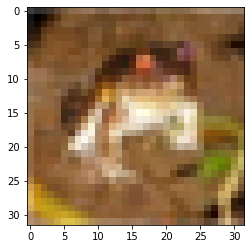

In [2]:
image = train[0][0] # 讀取圖片

plt.imshow(image)
plt.show()

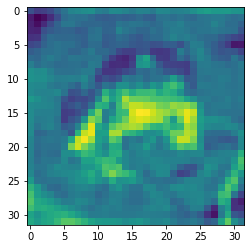

In [3]:
# 把彩色的圖片轉為灰度圖
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show()

通過調用 __cv2.calcHist(images, channels, mask, histSize, ranges)__ 函數來得到統計後的直方圖值

* imaages (list of array)：要分析的圖片
* channels：產生的直方圖類型。例：[0]→灰度圖，[0, 1, 2]→RGB三色。
* mask：optional，若有提供則僅計算 mask 部份的直方圖。
* histSize：要切分的像素強度值範圍，預設為256。每個channel皆可指定一個範圍。例如，[32,32,32] 表示RGB三個channels皆切分為32區段。
* ranges：像素的範圍，預設為[0,256]，表示<256。

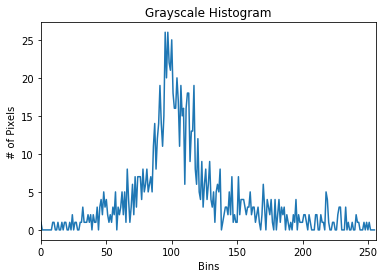

In [4]:
# 調用 cv2.calcHist 函數，回傳值就是 histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [5]:
print("hist shape:", hist.shape, "\n直方圖中前兩個值:", hist[:2]) # 1 表示該灰度圖中，只有 1 個 pixel 的值是 0，0 個 pixel 的值是 1

hist shape: (256, 1) 
直方圖中前兩個值: [[1.]
 [0.]]


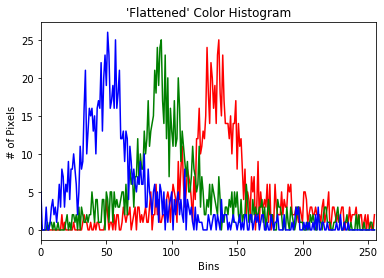

In [6]:
chans = cv2.split(image) # 把圖像的 3 個 channel 切分出來
colors = ("r", "g", "b")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

hist_df = pd.DataFrame({})


# 對於所有 channel
for (chan, color) in zip(chans, colors):
    # 計算該 channel 的直方圖
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    df = pd.DataFrame(hist)
    df.columns = {color}
    hist_df[color] = df[color]
 
    # 畫出該 channel 的直方圖
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()

In [7]:
bin_cut = ([0,16,32,48,64,80,96,112,144,160,176,192,208,224,240,256])
hist_df['cut_by_index'] = pd.cut(hist_df.index, bins = bin_cut, include_lowest=True)
group_df = hist_df.groupby('cut_by_index').sum()

In [8]:
hist_df

,r,g,b,cut_by_index
0,1.0,1.0,5.0,"(-0.001, 16.0]"
1,0.0,0.0,0.0,"(-0.001, 16.0]"
2,0.0,0.0,0.0,"(-0.001, 16.0]"
3,0.0,0.0,0.0,"(-0.001, 16.0]"
4,0.0,0.0,3.0,"(-0.001, 16.0]"
5,0.0,1.0,0.0,"(-0.001, 16.0]"
6,0.0,0.0,0.0,"(-0.001, 16.0]"
7,0.0,1.0,1.0,"(-0.001, 16.0]"
8,0.0,1.0,3.0,"(-0.001, 16.0]"
9,0.0,0.0,4.0,"(-0.001, 16.0]"


In [9]:
group_df

,r,g,b
cut_by_index,,,
"(-0.001, 16.0]",3.0,6.0,42.0
"(16.0, 32.0]",3.0,19.0,109.0
"(32.0, 48.0]",8.0,37.0,249.0
"(48.0, 64.0]",21.0,55.0,285.0
"(64.0, 80.0]",29.0,119.0,121.0
"(80.0, 96.0]",37.0,279.0,64.0
"(96.0, 112.0]",84.0,201.0,49.0
"(112.0, 144.0]",452.0,145.0,40.0
"(144.0, 160.0]",148.0,47.0,15.0


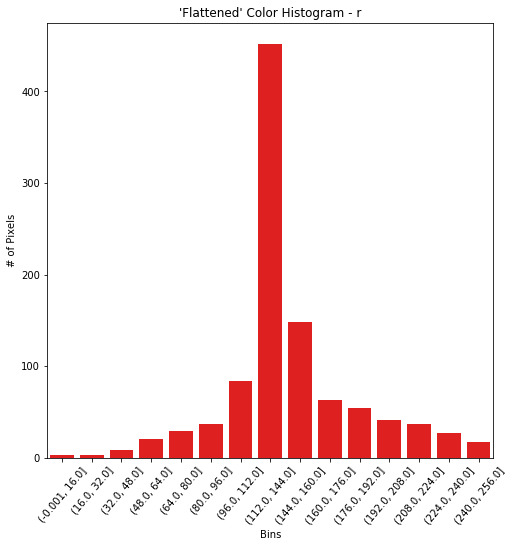

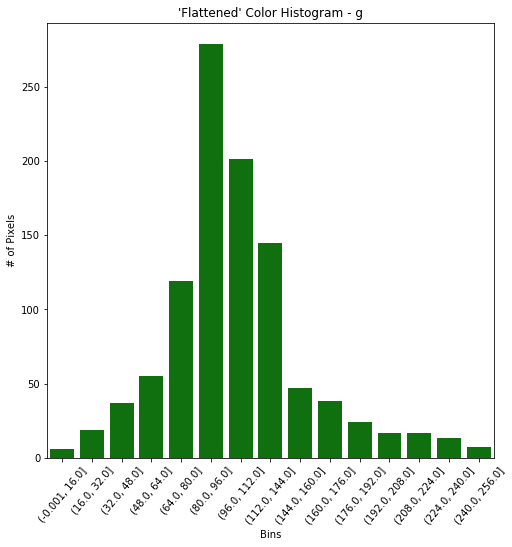

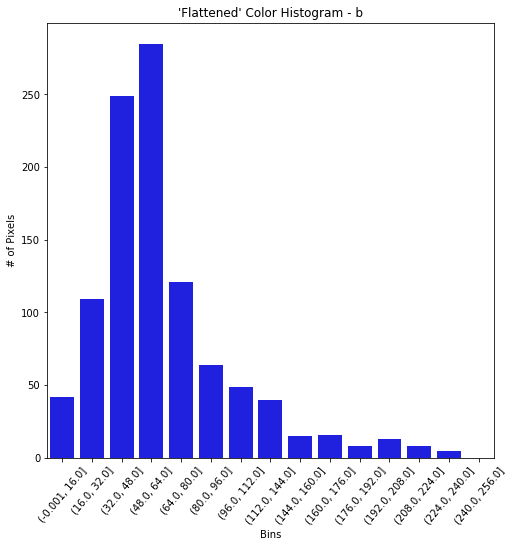

In [30]:
columns = ['r', 'g', 'b']
px = group_df.index.astype(str)

# 對於所有 channel
for color in columns:
    # 畫出該 channel 的直方圖
    plt.figure(figsize = (8, 8))
    py = group_df[color]
    sns.barplot(px, py, color=color)
    
    plt.xticks(rotation = 50)
    plt.title("'Flattened' Color Histogram - %s" % color)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.show()